In [1]:
import os
import time
import tensorflow as tf
from tensorflow.keras import models, layers, Model, callbacks
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from process_data import process_data
from nn_gridsearch import logdir

In [2]:
data = process_data()

In [3]:
for k, v in data.items():
    print(k)
    print(type(v))

x_train
<class 'numpy.ndarray'>
x_train_processed
<class 'numpy.ndarray'>
x_test
<class 'numpy.ndarray'>
x_test_processed
<class 'numpy.ndarray'>
y_train
<class 'numpy.ndarray'>
y_test
<class 'numpy.ndarray'>
pipeline
<class 'sklearn.pipeline.Pipeline'>


In [4]:
x_train_processed = data['x_train_processed']
y_train = data['y_train']

In [5]:
x_train_processed.shape

(1047, 11)

> note: old model constrution, using Sequential API

In [6]:
#model = models.Sequential()
#model.add(layers.Dense(32, activation='relu', input_shape=(x_train_processed.shape[1],)))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))


> changed to functional API --> more flexibility, for future expansion

In [7]:
input_ = layers.Input(shape=x_train_processed.shape[1:])
hidden_0 = layers.Dense(80, activation='relu')(input_)
hidden_1 = layers.Dense(80, activation='relu')(hidden_0)
hidden_2 = layers.Dense(80, activation='relu')(hidden_1)
hidden_3 = layers.Dense(80, activation='relu')(hidden_2)
hidden_4 = layers.Dense(80, activation='relu')(hidden_3)
hidden_5 = layers.Dense(80, activation='relu')(hidden_4)
output = layers.Dense(1, activation='sigmoid')(hidden_5)
model_custom = Model(inputs=[input_], outputs=[output])

In [8]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_custom.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC()])

In [9]:
model_custom.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 80)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                6480  

In [10]:
#history = model_custom.fit(
#    data['x_train_processed'], data['y_train'], validation_split=.2, epochs=300,
#    callbacks=[
#        EarlyStopping(patience=10, monitor='val_loss', mode='min'),
#        TensorBoard(logdir('custom_model'))])

In [11]:
model_gridsearch = models.load_model('./models/titanic_gridsearch_best.h5')

In [12]:
model_gridsearch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0_relu_alpha_0. (None, 31)                372       
_________________________________________________________________
batch_normalization_8 (Batch (None, 31)                124       
_________________________________________________________________
activation_8 (Activation)    (None, 31)                0         
_________________________________________________________________
dropout_0_30 (Dropout)       (None, 31)                0         
_________________________________________________________________
hidden_layer_1_relu_alpha_0. (None, 31)                992       
_________________________________________________________________
batch_normalization_9 (Batch (None, 31)                124       
_________________________________________________________________
activation_9 (Activation)    (None, 31)               

In [13]:
model_custom.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 1s 27ms/step - loss: 0.6958 - accuracy: 0.4466 - precision: 0.4453 - recall: 0.9322 - auc: 0.4347


[0.6958083510398865,
 0.4465648829936981,
 0.44534412026405334,
 0.9322034120559692,
 0.4347339868545532]

In [14]:
model_gridsearch.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 1s 16ms/step - loss: 0.5056 - accuracy: 0.7710 - precision_1: 0.8816 - recall_1: 0.5678 - auc_1: 0.8524


[0.5055856704711914,
 0.7709923386573792,
 0.8815789222717285,
 0.5677965879440308,
 0.8524011373519897]

> todo next - function to build model, sklearn wrapper from keras, pipelines, random grid search for model!

## experiments - progressively shrink data, compare model performance!


creating data: 0.3 of data boosted: True
boosting real data times: 1.2
fitting new generator on smaller data
Epoch 001 | ET 0.00 min | Avg Losses >> G/D 0.9190/1.0993 [D-Real: 0.3890 D-Fake: 0.7103]
Epoch 002 | ET 0.01 min | Avg Losses >> G/D 0.8902/0.9943 [D-Real: 0.2983 D-Fake: 0.6960]
Epoch 003 | ET 0.01 min | Avg Losses >> G/D 0.9209/0.8970 [D-Real: 0.2522 D-Fake: 0.6448]
Epoch 004 | ET 0.01 min | Avg Losses >> G/D 0.9897/0.8589 [D-Real: 0.2486 D-Fake: 0.6103]
Epoch 005 | ET 0.02 min | Avg Losses >> G/D 1.0097/0.8103 [D-Real: 0.1995 D-Fake: 0.6107]
Epoch 006 | ET 0.02 min | Avg Losses >> G/D 1.0323/0.8207 [D-Real: 0.1807 D-Fake: 0.6400]
Epoch 007 | ET 0.03 min | Avg Losses >> G/D 0.9981/0.8324 [D-Real: 0.1971 D-Fake: 0.6353]
Epoch 008 | ET 0.03 min | Avg Losses >> G/D 1.0365/0.8227 [D-Real: 0.2049 D-Fake: 0.6177]
Epoch 009 | ET 0.04 min | Avg Losses >> G/D 0.9737/0.7498 [D-Real: 0.2266 D-Fake: 0.5232]
Epoch 010 | ET 0.04 min | Avg Losses >> G/D 1.0479/0.7836 [D-Real: 0.2177 D-Fake

KeyboardInterrupt: 

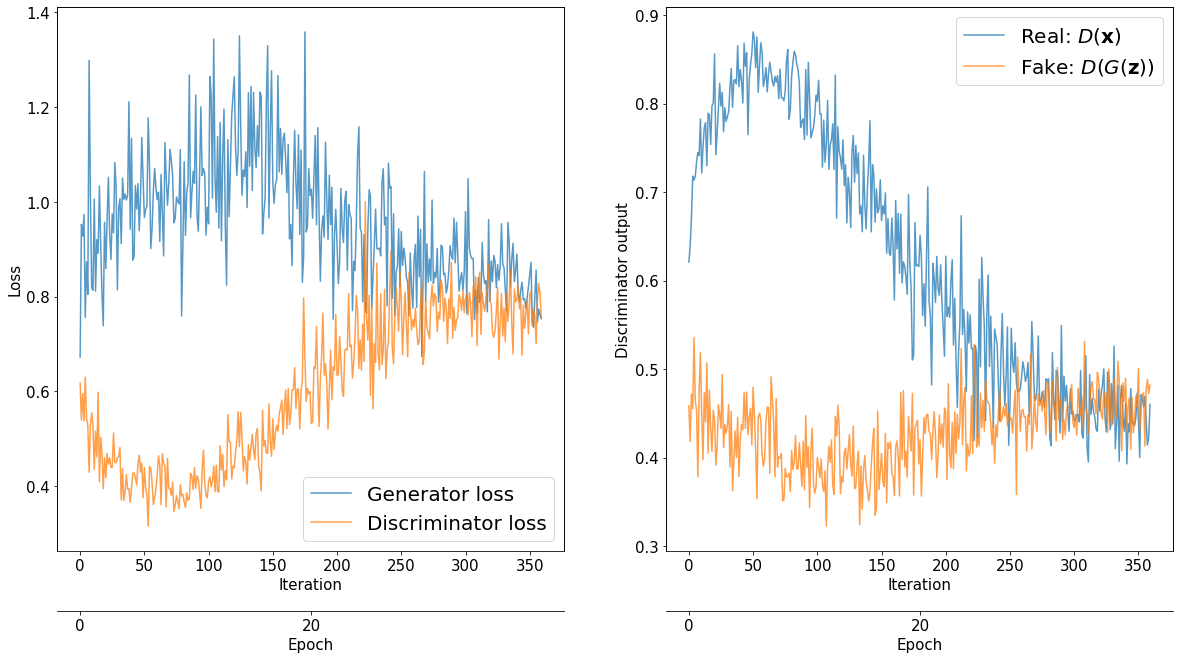

In [15]:
from process_data import process_data
from enhance_data import enhance_data
from nn_gridsearch import nn_gridsearch, make_model
from scipy.stats import reciprocal
from pprint import pprint


#include_synthetic = False
#synthetic_share = 3.0
#real_share = 0.2
    
#data = enhance_data(
#    include_synthetic=include_synthetic,
#    synthetic_share=synthetic_share,
#    real_share=real_share)
    
testing = process_data()
x_test = testing['x_test_processed']
y_test = testing['y_test']
    
grid_parameters = {
    'number_hidden_layers': list(range(1, 8)),
    'neurons': np.arange(1, 100).tolist(),
    'learning_rate': reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
    'dropout_rate': np.arange(.2, .6, .1).tolist(),
    'alpha': np.arange(.2, .35, .05).tolist(),
    'activation': ['elu', 'selu', 'relu']}

models_tested = []

# boost data progressively bigger to check results
for data_boost_x in [.2, .3, .5, 1]:

    # progressive rate of the full training set
    for data_rate in np.linspace(.3, .8, 6):
        
        # test each rate with boosted and non-boosted data
        for boost in (True, False):            
                
            print()
            print('================')
            print(f'creating data: {data_rate} of data boosted: {boost}')
            print(f'boosting real data times: {data_boost_x + 1}')
    
            data = enhance_data(real_share=data_rate, synthetic_share=data_boost_x, include_synthetic=boost)
            
            print(f'real')
            print(f'created training data: {data["x_train_processed"].shape[0]} samples total')
            grid = nn_gridsearch(
                make_model, 
                data['x_train_processed'], data['y_train'],
                grid_parameters,
                n_iterations=20,
                verbose=0)
            
            best_model = grid.best_estimator_.model
            stats = best_model.evaluate(x_test, y_test)
            
            results = {
                'model': best_model,
                'data_boosted_x': data_boost_x + 1 if boost else 0,
                'accuracy': stats[1],
                'share_real_data': data_rate,
                'boosted_data': boost,
                'number_training_samples': data['y_train'].shape[0]}
            
            print('finished grid - results:')
            pprint(results)
            models_tested.append(results)
    
# note = the wrapper takes a FUNCTION as input!
#grid = nn_gridsearch(
#    make_model, 
#    data['x_train_processed'], data['y_train'],
#    grid_parameters,
#    n_iterations=33,
#    verbose=0)
    
#best_model = grid.best_estimator_.model
#best_model.evaluate(data['x_test_processed'], data['y_test'])

In [ ]:
df = pd.DataFrame(models_tested)
df

In [ ]:
df.sort_values(by=['share_real_data', 'data_boosted_x'])

In [ ]:
with open('./boosting_results.csv', mode='w') as file:
    df.to_csv(file)

In [ ]:
df.drop_duplicates(subset=['share_real_data', 'boosted_data', 'data_boosted_x']).sort_values(['share_real_data', 'data_boosted_x'])

In [ ]:
import seaborn as sns

In [ ]:
sns.catplot(
    x='data_boosted_x', 
    hue='boosted_data', 
    y='accuracy', 
    data=df, 
    col='share_real_data',
    kind='bar',
    col_wrap=2,
    height=10
)